# Week 2: 
##### 1. Plotting correlation between bigWigs
I chose the pearson corrlation to plot crrelation to plot the distances between the correlation coefficients for the samples because the data is linear. If the data was ordinal, then I would have chosen spearman correlation.

##### 2. Generating a set of reproducible peaks with bedtools intersect
For the intersection strategry to produce a set of reproducible peaks, I chose 0.5 as it seemeed to be the best balance between stringent and lenient while adeqately capturing overlaps.

##### 3. Filtering peaks found in ENCODE blacklist regions
To remove blacklisted regions in the peaks that coincide with the blacklisted regions in the genome, I used the method '-v', which according to bedtools intersect documentation, only reports those entries in A that have no overlap in B. This method of excluding any overlap with the blacklist is the generally accepted method to remove these regions.

# Week 3: 
##### 1. Generating a signal intensity plot for all human genes using computeMatrix and plotProfile for IP samples
<img src="/projectnb/bf528/students/amuldoon/project-2-n-muldoon/results/IP1_Profiles.png" width=350/>
<img src="/projectnb/bf528/students/amuldoon/project-2-n-muldoon/results/IP2_Profiles.png" width=350/>

We used the computeMatrix from deeptools (v3.5.6) to generate a matrix of counts per genome regions from the bigWig files generatedd earlier, a bed file of the transcription start and end sites for every gene in the reference genome (hg38) generated from the UCSC Table Browser(https://genome.ucsc.edu/cgi-bin/hgTables). This matrix was then used to generate a visualization of the IP samples across the genes through the plotProfile tool in deeptools using the same version as mentioned earlier. As can be seen in the data above in both the IP samples, there is a clear peak of counts before the transcription start site, suggesting that the protein of interest is upstream of transcription around potentially promoter regions, likely something like a transcription binding factor that is active in transcription regulation.

##### 2. Finding enriched motifs in ChIP-seq peaks
Top results, as seen in the table below, of the most enriched motifs in the ChIP-seq peaks are RUNX and RUNX1, which is to be expected because RUNX1 was the protein of interest in the ChIP-seq experiment, and members of the RUNX family are involved in transcription regulation, further supported by the peak seen in the profile image.

In [2]:
import pandas as pd
motifs = pd.read_csv('/projectnb/bf528/students/amuldoon/project-2-n-muldoon/results/motifs/knownResults.txt',sep='\t')
motifs.head(10)

,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 3026),% of Target Sequences with Motif,# of Background Sequences with Motif(of 43391),% of Background Sequences with Motif
0,RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer,SAAACCACAG,0.000000e+00,-1015.0,0.0,923.0,30.50%,2173.9,5.01%
1,RUNX1(Runt)/Jurkat-RUNX1-ChIP-Seq(GSE29180)/Homer,AAACCACARM,9.999889e-321,-737.2,0.0,925.0,30.57%,3104.4,7.15%
2,RUNX2(Runt)/PCa-RUNX2-ChIP-Seq(GSE33889)/Homer,NWAACCACADNN,1.000000e-220,-508.5,0.0,704.0,23.27%,2505.1,5.77%
3,RUNX-AML(Runt)/CD4+-PolII-ChIP-Seq(Barski_et_a...,GCTGTGGTTW,1.000000e-197,-455.5,0.0,648.0,21.41%,2344.4,5.40%
4,Foxa2(Forkhead)/Liver-Foxa2-ChIP-Seq(GSE25694)...,CYTGTTTACWYW,1.000000e-89,-205.5,0.0,387.0,12.79%,1702.8,3.92%
5,FOXA1(Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)...,WAAGTAAACA,1.000000e-87,-201.4,0.0,474.0,15.66%,2446.0,5.63%
6,Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer,NATGASTCABNN,1.000000e-85,-197.5,0.0,241.0,7.96%,718.3,1.65%
7,FOXA1(Forkhead)/MCF7-FOXA1-ChIP-Seq(GSE26831)/...,WAAGTAAACA,1.000000e-82,-190.9,0.0,412.0,13.62%,1998.1,4.60%
8,Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer,GGATGACTCATC,1.000000e-82,-189.8,0.0,283.0,9.35%,1022.8,2.36%
9,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,1.000000e-81,-187.0,0.0,293.0,9.68%,1105.5,2.55%


# Week 4: 
##### 1. Methods
Read quality control was peformed for each of the four fastq sample files (2 control, 2 experimental) using FastQC (v0.11.8), and the Trimmomatic (v0.39) was used to trim adapaters and low quality reads using the default parameters. An index for the human reference genome (GRCh38) was built and the reads of the samples. were aligned to this genome using bowtie2 (v2.5.4). Samtools (v1.21) was used to sort and index the BAM alignment files for efficient analysis, and the statistics on the alignments was produced using the flagstat utility in samtoools. All of the quality control and preprocessing statistics mentioned previously were collated into a multiqc (v1.28) report. Deeptools (v3.5.6) bamCoverage was used to generate coverage trcks for the number of reads per genomic interval for each sample with the default parameters, and a summary matrix of this information was created through the deeptools multibigwig tool. Pearson's correlation method was used to plot the correlation for the bigWig files, which confirmed the experimental (IP) files were correlated and the control samples were correlated. Peak calling of the aligned reads was performed using Model-Based Analysis of Chip-Seq, or MACS3 (v3.0.3) with default parameters. Bedtools (v2.31.1) was used to produce reproducible peaks with the intesect function using an overlap of 0.5, and problematic regions found in the ENCODE blacklist (https://github.com/Boyle-Lab/Blacklist) was removed where any peaks that overlap with the blacklisted region was removed. HOMER (5.1) was used to annotate the peaks using the most proximal genomic feature. We used the computeMatrix from deeptools (v3.5.6) to generate a matrix of counts per genome regions from the bigWig files generatedd earlier, a bed file of the transcription start and end sites for every gene in the reference genome (hg38) generated from the UCSC Table Browser(https://genome.ucsc.edu/cgi-bin/hgTables), and used plotProfile from deeptools to visualize the peak in the context of the transcript start and end sites. HOMER was then used to produce a list of enriched motifs in the peaks previously generated.

##### 2. Sequence QC
The sample file INPUT_rep2 had approximately half of the amount of reads mapped in comparison to the rest of the sample files, suggesting potential lower quality data in this file. Additionly, the sample file IP_rep2 had significantly more duplicate reads, which may have been because of the experimental setup. The read count for each of the samples seems to be adequate, and the amount of surviving reads following trimming seems to be sufficient for each of the samples. IP_rep1 sample file has the lowest count of unique reads, but all samples passedd the fastqc quality control check for the quality scores. However, the control samples had less overall GC content than the experimental files, perhaps because of the inherent nature of control samples.

##### 3. Overlap your ChIPseq results with the original RNAseq data - Figure 2F

In [3]:
rnaseq = pd.read_csv('results/GSE75070_MCF7_shRUNX1_shNS_RNAseq_log2_foldchange.txt', sep='\t')
print(rnaseq.head())
de_rnaseq = rnaseq[rnaseq['padj'] < 0.01]
upregulated = de_rnaseq[de_rnaseq['log2FoldChange'] > 1]
downregulated = de_rnaseq[de_rnaseq['log2FoldChange'] < -1]
print(len(upregulated))
print(len(downregulated))
peaks = pd.read_csv('results/annotated_peaks.txt', sep='\t')
peaks.head(10)
print(len(peaks))

  genename                                  transcript  log2FoldChange  \
0    OARD1                                   NM_145063        0.186841   
1  WBSCR22  NM_001202560,NM_017528,NR_037776,NR_045512        0.037881   
2     PIGZ                                   NM_025163        0.122346   
3    PRDX5               NM_012094,NM_181651,NM_181652        0.250313   
4    PEX16                         NM_004813,NM_057174       -0.300675   

       padj  
0  0.545806  
1  0.907305  
2  0.841445  
3  0.118073  
4  0.183572  
687
466
3026


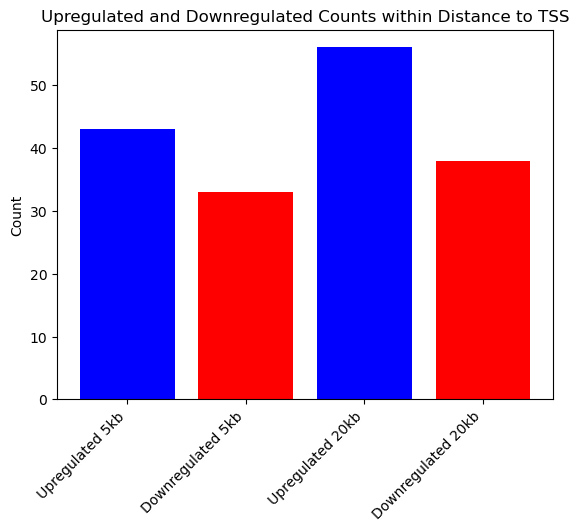

In [4]:
import matplotlib.pyplot as plt
# upregulated; count=687
overlap = peaks['Gene Name'].isin(upregulated['genename'])
upregulated_overlap=peaks[overlap]

# downregulated; count = 466
overlap = peaks['Gene Name'].isin(downregulated['genename'])
downregulated_overlap=peaks[overlap]

up_5kb = upregulated_overlap[(upregulated_overlap['Distance to TSS'] < 5000) & (upregulated_overlap['Distance to TSS'] > -5000)].shape[0]
down_5kb = downregulated_overlap[(downregulated_overlap['Distance to TSS'] < 5000) & (downregulated_overlap['Distance to TSS'] > -5000)].shape[0]
up_20kb = upregulated_overlap[(upregulated_overlap['Distance to TSS'] < 20000) & (upregulated_overlap['Distance to TSS'] > -20000)].shape[0]
down_20kb = downregulated_overlap[(downregulated_overlap['Distance to TSS'] < 20000) & (downregulated_overlap['Distance to TSS'] > -20000)].shape[0]

labels = ['Upregulated 5kb', 'Downregulated 5kb', 'Upregulated 20kb', 'Downregulated 20kb']
counts = [up_5kb, down_5kb, up_20kb, down_20kb]

fig, ax = plt.subplots()

ax.bar(labels, counts, color=['blue', 'red', 'blue', 'red'])

# Add labels and title
ax.set_ylabel('Count')
ax.set_title('Upregulated and Downregulated Counts within Distance to TSS')
plt.xticks(rotation=45, ha='right')
plt.show()

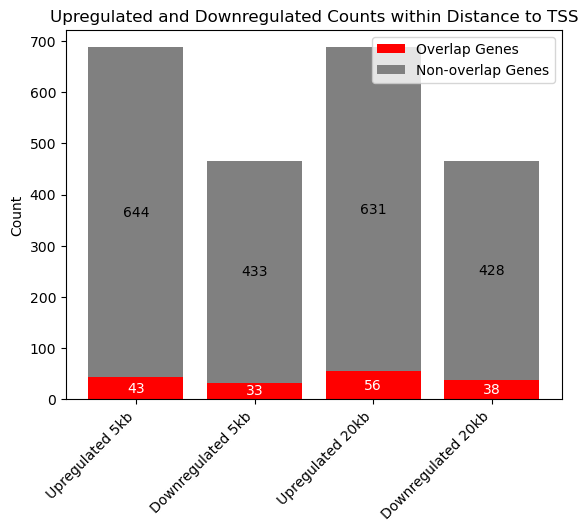

In [5]:
# Calculate non-overlapping counts
up_5kb_non_overlap = 687 - up_5kb
down_5kb_non_overlap = 466 - down_5kb
up_20kb_non_overlap = 687 - up_20kb
down_20kb_non_overlap = 466 - down_20kb

# Labels and counts for stacked barplot
labels = ['Upregulated 5kb', 'Downregulated 5kb', 'Upregulated 20kb', 'Downregulated 20kb']
bottom_counts = [up_5kb, down_5kb, up_20kb, down_20kb]  # Bottom stack is overlap
top_counts = [up_5kb_non_overlap, down_5kb_non_overlap, up_20kb_non_overlap, down_20kb_non_overlap]  # Top stack is non-overlap

# Create the stacked barplot
fig, ax = plt.subplots()

# Create the bottom bars (overlap genes)
bars_bottom = ax.bar(labels, bottom_counts, color='red', label='Overlap Genes')

# Create the top bars (non-overlap genes), stacked on top of the bottom bars
bars_top = ax.bar(labels, top_counts, bottom=bottom_counts, color='grey', label='Non-overlap Genes')

# Add labels and title
ax.set_ylabel('Count')
ax.set_title('Upregulated and Downregulated Counts within Distance to TSS')
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend()

# Add count labels on top of the bars
for bar in bars_bottom:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, str(height), ha='center', va='center', color='white', fontsize=10)

for bar in bars_top:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, bars_bottom[bars_top.index(bar)].get_height() + height / 2,
            str(height), ha='center', va='center', color='black', fontsize=10)

# Display the plot
plt.show()


Focusing on your results for figure 2F: 
Do you observe any differences in the number of overlapping genes from both analyses? 
- Yes, the total number of RUNX1 bound genes in my analysis was lower than in their analysis, particularly noticeable in the +/- 20kb of whole gene. 

If you do observe a difference, explain at least two factors that may have contributed to these differences.
- Considering I used the same thresholds as the authors, the reason why I had lower upregulated/downregulated genes further from the gene must be from a preprocessing step. More evidence of this can be seen in the fact that I identified 3026 RUNX1 ChIP-Seq peaks while they identified 3466. One possible reason for this is that I aligned to hg38, while they aligned to hg19, for the human reference genome. Another possible factor that may have contributed to the differences is that I used MACS3 foor peak calling while they used HOMER "-style factor", thus possibly leading to differences in number of peaks called.

What is the rationale behind combining these two analyses in this way? What additional conclusions is it supposed to enable you to draw?
- The rationale behind overlapping the ChIP-seq up/downreuglated genes to the RNA-seq up/downregulated genes is to see if there was an increase or decrease in RUNX1-bound genes at the promoter regions after RUNX1-knockdown. Looking at the proxiimity to the transcription start site and comparing DEGs at the different distances supplies information about if RUNX1 paarticciipates through direct regulation or not. Additional conclusions include determiniing the direct role or activity of RUNX1 during transcriptional activation and repression.


##### 4. Figure 2D - MALAT1
![malat1](results/MALAT1.png)

##### 5. Figure 2E - NEAT1
![neat1](results/NEAT1.png)

Focusing on your results for figures 2D and 2E:
From your annotated peaks, do you observe statistically significant peaks in these same two genes?
- Yes, there are statistically siignificant peaks in the same two genes for each of the samples.

How similar do your genomic tracks appear to those in the paper? If you observe any differences, comment briefly on why there may be discrepancies.
- IP_rep1 peaks in MALAT1 look very similar, while IP_rep2 peaks look to have more noise andd less similar results in the actual gene kilobases. The reason for this could be beccause IP_rep2 had significantly more duplicated reads than any other sample, potentially causing more noise and less signal in the peaks. A similar pattern can also be seen in NEAT1, likely caused by the same reason.

##### 6. Supplementary Figures - S2A
Re-create the table found in supplementary figure S2A. Compare the results with your own findings.

Do you observe differences in the reported number of raw and mapped reads?
- No, except perhaps IP_rep2 having ~7,000,000 more mapped reads and IP_rep1 having ~10,000,000 more mapped reads.

If so, provide at least two explanations for the discrepancies.
- One possible reason is that quality control thresholds for the samples were different, as we used FastQC for quality control and Trimommtic for trimming adapters while they used HOMER for quality control andd Bowtie2 for trimming. Another potential reason is that they used the input control samples as a control in normalization while we did not.

In [7]:
pd.read_csv('results/samtools-flagstat-dp.tsv', sep='\t')

,Sample,Total Reads,Total Passed QC,Mapped,Duplicates,Paired in Sequencing,Properly Paired,Self and mate mapped,Singletons,Mate mapped to diff chr,Diff chr (mapQ >= 5)
INPUT_rep1,30.041540,30.041540,28.533545,0,0,0,0,0,0,0,NaN
INPUT_rep2,10.890224,10.890224,9.994337,0,0,0,0,0,0,0,NaN
IP_rep1,29.050434,29.050434,27.983380,0,0,0,0,0,0,0,NaN
IP_rep2,28.968174,28.968174,28.363873,0,0,0,0,0,0,0,NaN


##### 7. Supplementary Figures - S2B
![corr_plot](results/pearson_plot.png)

Do you observe any differences in your calculated metrics?
- No, my plot actually looks identical

What was the author’s takeaway from this figure? What is your conclusion from this figure regarding the success of the experiment?
- The author's takeaway from this figure is that the correlation was sufficient to conclude the ChIP-seq experimeent was of adequate quuality and reproducibility. Considering my matrix was at least visually the exact same, showing high correlation for the biological replicates, I woul d come to the same conclusion that the antibody immunoprecipitation was successful in this experiment.

##### 8. Supplementary Figures - S2C

In [12]:
%%bash
wc -l /projectnb/bf528/materials/project-2-chipseq/refs/rep1_peaks.narrowPeak
wc -l /projectnb/bf528/materials/project-2-chipseq/refs/rep2_peaks.narrowPeak
wc -l /projectnb/bf528/students/amuldoon/project-2-n-muldoon/work/be/2b0a8c8b92e454a8f5456ff19ba4ae/repr_peaks.bed
wc -l /projectnb/bf528/students/amuldoon/project-2-n-muldoon/work/be/2b0a8c8b92e454a8f5456ff19ba4ae/cleaned_peaks.bed

13161 /projectnb/bf528/materials/project-2-chipseq/refs/rep1_peaks.narrowPeak
17440 /projectnb/bf528/materials/project-2-chipseq/refs/rep2_peaks.narrowPeak
3349 /projectnb/bf528/students/amuldoon/project-2-n-muldoon/work/be/2b0a8c8b92e454a8f5456ff19ba4ae/repr_peaks.bed
3026 /projectnb/bf528/students/amuldoon/project-2-n-muldoon/work/be/2b0a8c8b92e454a8f5456ff19ba4ae/cleaned_peaks.bed


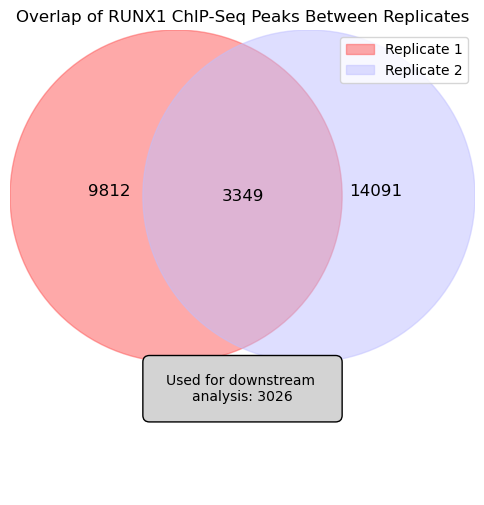

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 8))  # Taller to make room for the box

# Circle positions and size
circle_radius = 2.5
circle1_center = (2.5, 4.5)
circle2_center = (4.5, 4.5)

# Draw the two overlapping circles
circle1 = patches.Circle(circle1_center, circle_radius, alpha=0.5, color='#FE5555', label='Replicate 1')
circle2 = patches.Circle(circle2_center, circle_radius, alpha=0.5, color='#BFBFFF', label='Replicate 2')
ax.add_patch(circle1)
ax.add_patch(circle2)

# Venn values
rep1_only = 13161 - 3349
rep2_only = 17440 - 3349
overlap = 3349

# Add text inside the circles
ax.text(circle1_center[0] - 1, circle1_center[1], str(rep1_only), fontsize=12, ha='center')
ax.text(circle2_center[0] + 1, circle2_center[1], str(rep2_only), fontsize=12, ha='center')
ax.text(3.5, 4.5, str(overlap), fontsize=12, ha='center', va='center')

# Add box below for downstream analysis note
box_text = str("Used for downstream "+'\n'+"analysis: 3026")
box = patches.FancyBboxPatch((2.1, 1.2), 2.8, 0.8,
                             boxstyle="round,pad=0.1", 
                             linewidth=1, facecolor="lightgrey", edgecolor="black")
ax.add_patch(box)
ax.text(3.5, 1.6, box_text, ha='center', va='center', fontsize=10)

# Styling
ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Overlap of RUNX1 ChIP-Seq Peaks Between Replicates")
plt.legend(loc='upper right')
plt.show()


Do you observe any differences in your results compared to what you see?
- Yes, I have around double amount of peaks for rep1 and also ~4,000 more for rep2, however the count of overlap and after removing the blacklist regions I have ~400 less peaks. 

If so, provide at least two explanations for the discrepancies in the number of called peaks.

- One possible reason for this is that I aligned to hg38, while they aligned to hg19, for the human reference genome. Another possible factor that may have contributed to the differences is that I used MACS3 foor peak calling while they used HOMER "-style factor", thus possibly leading to differences in number of peaks called.

##### 9. Analyze the annotated peaks - DAVID

In [32]:
gene_names=peaks['Gene Name']
gene_names.to_csv('gene_names_for_david.txt', index=False, header=False)

Index(['Category', 'Term', 'Count', '%', 'PValue', 'Genes', 'List Total',
       'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni', 'Benjamini',
       'FDR'],
      dtype='object')


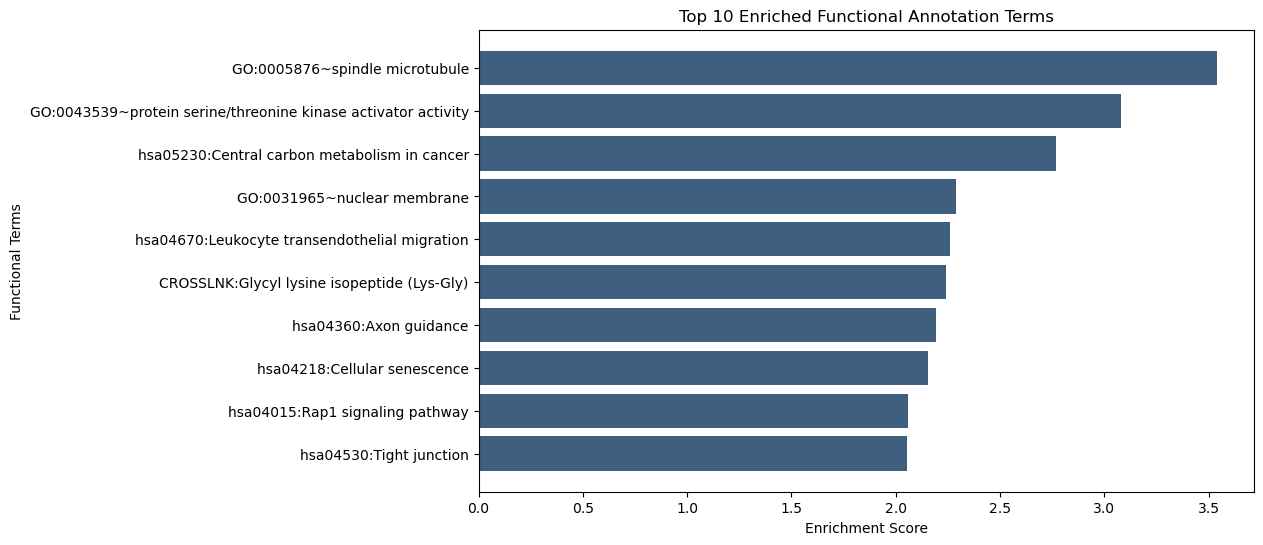

In [58]:

david_df = pd.read_csv('results/functional_annotation_chart.txt', sep='\t')
print(david_df.columns)
df_filtered = david_df[david_df['FDR'] < 0.05]
df_filtered = df_filtered.sort_values(by='Fold Enrichment', ascending=False)

# Select the top 10 terms (you can adjust this number)
top_terms = df_filtered.head(10)
# print(top_terms)
top_terms.iloc[5, 1] = 'CROSSLNK:Glycyl lysine isopeptide (Lys-Gly)'
# Create the plot
plt.figure(figsize=(10, 6))

# Bar plot of top 10 enriched terms
plt.barh(top_terms['Term'], top_terms['Fold Enrichment'], color='#3F5F7F')

# Add labels and title
plt.xlabel('Enrichment Score')
plt.ylabel('Functional Terms')
plt.title('Top 10 Enriched Functional Annotation Terms')

# Show the plot
plt.gca().invert_yaxis()  # To have the highest score at the top
plt.show()



The top 10 enriched terms include mostly cell structure and typical cellular activity like cell movement or cellular division (spindle microtubule, leukocyte transendothelial migration, axon guidance, cellulr senescence). Considering what we know about RUNX1, this might suggest its reugulatory role is in typical cellular functions. The enrichment in the GO Term for the nuclear membrane suggests what we expect, that RUNX1 is involved in traanscriptional regulation as transcription occurs within the nuclear membrane. The enrichment in carbon metabolism in cancer is expected because, as stated in the paper, we know that mutations at RUNX1 gene locus is associated with leukemia or other cancers. Furthermore, it is notable that leukocyte transendothelial migration is enriched considering RUNX1's known role in leukemia, and perhaps suggests a role in increasing metastatic activity.

##### 10. Discussion Questions - can't find the github repo link